## Final Project - Infinate Recharge - Power Cell Recognition

The following two functions are written to train a binary linear classifier. The first function "Apre" preprocesses the images and organizes them to train the classifier. The first attempt uses two image preprocessing steps. The image is blurred and then converted to a grayscale image using the open computer vision library. This results in a matrix of values between 0 and 255 which is rearranged into a matrix with each row representing an image. The second function "extractLabels" checks to see if there is data in the 'objects' section of the labels if no data exists is places a -1 in the label vector "y". 

In [1]:
# Importing Images to Python if they are jpgs
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import cv2   # Open Computer vision
import glob
import json  # JavaScript Object Notation encoder and decoder
from sklearn.svm import LinearSVC 
from sklearn.utils import shuffle

# This Function takes and returns a 2 dimensional Pre-processed matrix of features and instances for classifying a linear clasifier
def Apre(images):
    n = len(images) # The number of images in the file
    
#    # The dimensions of the images
#    row = 480 
#    col = 640
    
#    # The length of each new row
    scale_percent = 10 # percent of original size
#    length = int((480*scale_percent/100)*(640*scale_percent/100))
    
    # loading a ball template for template matching of balls
    temp = plt.imread("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\BallTemplate2.jpg")
        
    # Converting to Grayscale
    grayTemp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    # resizing the image to reduce the number of features and the 
    width = int(grayTemp.shape[1] * scale_percent / 100)
    height = int(grayTemp.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    grayResizedTemp = cv2.resize(grayTemp, dim, interpolation = cv2.INTER_AREA)
    
    # The length of each new row (IF USING TEMPLATE MATCHING PREPROCESSING)
    scale_percent = 10 # percent of original size
    length = (int((480*scale_percent/100)) - height + 1)*(int(640*scale_percent/100) - width +1)
        
    # creating a new A matrix for pre processed data
    A = np.zeros((n,length))
    
    for i in range(n):
        A1 = np.array(images.pop()) # pops an image out of the list
        # print(type(A1))
        
        ###################################################################
        # Preprocessing Data goes here
        ###################################################################
        
        # Blurring the Image
        # Ab = cv2.medianBlur(A1,15)
        
        # Converting to Grayscale
        Ag = cv2.cvtColor(A1, cv2.COLOR_RGB2GRAY)
        # print(type(Ag))
        
        # resizing the image to reduce the number of features
        # scale_percent = 10 # percent of original size
        width = int(Ag.shape[1] * scale_percent / 100)
        height = int(Ag.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        grayResized = cv2.resize(Ag, dim, interpolation = cv2.INTER_AREA)
        
        ########## start of the template matching code #########
        
        # template matching with the ball image
        #   cv::TM_SQDIFF = 0,
        #   cv::TM_SQDIFF_NORMED = 1,
        #   cv::TM_CCORR = 2,
        #   cv::TM_CCORR_NORMED = 3,
        #   cv::TM_CCOEFF = 4,
        #   cv::TM_CCOEFF_NORMED = 5
        res = cv2.matchTemplate(grayResized.astype(np.float32),grayResizedTemp.astype(np.float32),2) # expects a float
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        res = res.astype(np.float32)

        ###################################################################
        
        
        # Reshaping the image into an array and storing into a matrix
        # A[i,:] = np.reshape(Ag,(1,length)) # Just Gray Scale
        # A[i,:] = np.reshape(grayResized,(1,length)) # no template matching but resized
        A[i,:] = np.reshape(res,(1,length)) # Gray Scale + Resize + Template Matching
        # print(len(A[0]))
    
    return A # Returns an A matrix of pre processed pixles from each image in the specified file path

In [2]:
# This function extracts binary classification lables from the data lable files in the specified path
def extractLabels(lables):
    # labels is a list with all the json lables for the annotations in the path
    n = len(lables)
    
    y = np.zeros((n,1))
    for i in range(n):
        text = labels.pop()
        stringData = text.read().replace("\n", " ")

        data = json.loads(stringData)
        if data['objects'] == []:
            y[i] = -1 # no power cells are present
        else:
            y[i] = 1 # power cells are in the image

    return [y] # Returns a vecotor of binary classification labels (ie 1 for PowerCells and -1 for No PowerCells )

## Showing if images are linearly seperable with a binary classifier

In [3]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Video\\img\\*.png")]

A1 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Video\\ann\\*.json")]

y1 = np.array(extractLabels(labels)) # calling the function to form binary labels
y1 = np.reshape(y1,(len(y1[0]),1))
# print(y2)

In [4]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\img\\*.png")]

A2 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\ann\\*.json")]

y2 = np.array(extractLabels(labels)) # calling the function to form binary labels
y2 = np.reshape(y2,(len(y2[0]),1))
# print(y2)

In [5]:
# Creating a larger array from the two data files read in
A = np.vstack((A1,A2))
y = np.vstack((y1,y2))

In [6]:
print('Rows in A:',len(A))
print('Columns in A:',len(A[0]))

print('Rows in y:',len(y))
print('Columns in y:',len(y[0]))

Rows in A: 4551
Columns in A: 1836
Rows in y: 4551
Columns in y: 1


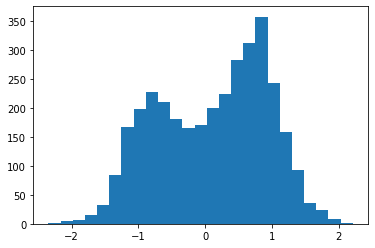

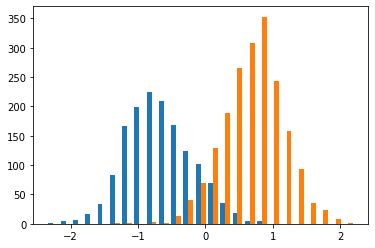

Binary classification error rate on holdout data 39.92963940193492 %



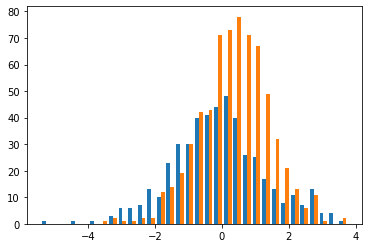

In [10]:
# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 4
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

i = 0
Ahold = Adata[:,:,i]
yhold = ydata[:,:,i]

# reloving all elements from the list
AtrainList.clear()
ytrainList.clear()
for j in range(k):
    if i != j: # Assining training databut not the hold out data
        AtrainList.append(Adata[:,:,j])
        ytrainList.append(ydata[:,:,j])
# converting lists back to arrays
Atrain = np.vstack(AtrainList)
ytrain = np.vstack(ytrainList)

# The Psuedo Inverse (Least Squares Training)
w = np.linalg.inv(Atrain.T@Atrain)@Atrain.T@ytrain

# creating histogram of data before sign function
yUSout = Atrain@w

plt.hist(yUSout, bins='auto')  # arguments are passed to np.histogram
plt.show()



# hisorgram of ys if a ball is absent
yOut1 = [] #creating a list
for k in range(len(yUSout)):
    if ytrain[k] == -1:
        yOut1.append(yUSout[k]) # adds the element of the array to the list

# hisorgram of ys if a ball is present
yOut2 = [] #creating a list
for k in range(len(yUSout)):
    if ytrain[k] == 1:
        yOut2.append(yUSout[k]) # adds the element of the array to the list

plt.hist([np.array(yOut1),np.array(yOut2)], bins='auto')  # arguments are passed to np.histogram
plt.show()



# counting classification errors in the holdout set
yOut = np.zeros((len(yhold)) )
eC = 0 # The Error Counter
for ctr2 in range(len(yhold)):
    yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    # print(yOut[ctr2],yhold[ctr2])

    # Counting Classification Errors from the Calculated Weights
    if yOut[ctr2] != yhold[ctr2]:
        eC = eC + 1
# print(eC)
print('Binary classification error rate on holdout data', (eC/len(yhold))*100,'%\n')


# hisorgram of ys if a ball is absent
yOut1 = [] #creating a list
for k in range(len(yOut)):
    if yhold[k] == -1:
        yOut1.append(Ahold[k,:]@w) # adds the element of the array to the list

# hisorgram of ys if a ball is present
yOut2 = [] #creating a list
for k in range(len(yOut)):
    if yhold[k] == 1:
        yOut2.append(Ahold[k,:]@w) # adds the element of the array to the list

plt.hist([np.array(yOut1),np.array(yOut2)], bins='auto')  # arguments are passed to np.histogram
plt.show()


## Start of Binary Classifier Training of JPG (Images)

In [42]:
# Reads all the images from the folder specified in the path and stores them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Video\\img\\*.png")]

A1 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Video\\ann\\*.json")]

y1 = np.array(extractLabels(labels)) # calling the function to form binary labels
y1 = np.reshape(y1,(len(y1[0]),1))
# print(y2)

In [43]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\img\\*.png")]

A2 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\ann\\*.json")]

y2 = np.array(extractLabels(labels)) # calling the function to form binary labels
y2 = np.reshape(y2,(len(y2[0]),1))
# print(y2)

In [44]:
# Creating a larger array from the two data files read in
A = np.vstack((A2,A1))
y = np.vstack((y2,y1))

In [45]:
print('Rows in A:',len(A))
print('Columns in A:',len(A[0]))

print('Rows in y:',len(y))
print('Columns in y:',len(y[0]))

Rows in A: 4551
Columns in A: 1836


In [131]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 4
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

Terr = 0 # The total average error for a final number
for i in range(k):
    Ahold = Adata[:,:,i]
    yhold = ydata[:,:,i]
    
    # reloving all elements from the list
    AtrainList.clear()
    ytrainList.clear()
    for j in range(k):
        if i != j: # Assining training databut not the hold out data
            AtrainList.append(Adata[:,:,j])
            ytrainList.append(ydata[:,:,j])
    # converting lists 
    Atrain = np.vstack(AtrainList)
    ytrain = np.vstack(ytrainList)


In [135]:
len(Atrain)

3411

In [14]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 10
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

TerrT = 0 # The total average error for a final number
TerrH = 0 # The total average error for a final number
for i in range(k):
    Ahold = Adata[:,:,i]
    yhold = ydata[:,:,i]
    
    # reloving all elements from the list
    AtrainList.clear()
    ytrainList.clear()
    for j in range(k):
        if i != j: # Assining training databut not the hold out data
            AtrainList.append(Adata[:,:,j])
            ytrainList.append(ydata[:,:,j])
    # converting lists 
    Atrain = np.vstack(AtrainList)
    ytrain = np.vstack(ytrainList)

    
    # The Psuedo Inverse (Least Squares Training)
    w = np.linalg.inv(Atrain.T@Atrain)@Atrain.T@ytrain
    
    # Counting classification errors on the training set
    yOut = np.zeros((len(ytrain)) )
    eC = 0 # The Error Counter
    for ctr2 in range(len(yhold)):
        yOut[ctr2] = np.sign(Atrain[ctr2,:]@w)
    
        # Counting Classification Errors from the Calculated Weights
        if yOut[ctr2] != ytrain[ctr2]:
            eC = eC + 1
    print('Binary classification error rate on training data', (eC/len(ytrain))*100,'%')
    TerrT = TerrT + (eC/len(ytrain))
    
    
    # counting classification errors in the holdout set
    yOut = np.zeros((len(yhold)) )
    eC = 0 # The Error Counter
    for ctr2 in range(len(yhold)):
        yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    
        # Counting Classification Errors from the Calculated Weights
        if yOut[ctr2] != yhold[ctr2]:
            eC = eC + 1
    print('Binary classification error rate on holdout data', (eC/len(yhold))*100,'%\n')
    TerrH = TerrH + (eC/len(yhold))

print('\n')
# Total Average error
print('The Average Training Error is: ',(TerrT/k)*100,'%')
print('The Average Holdout Error is: ',(TerrH/k)*100,'%')


Binary classification error rate on training data 0.9768009768009768 %
Binary classification error rate on holdout data 35.38461538461539 %

Binary classification error rate on training data 1.0012210012210012 %
Binary classification error rate on holdout data 35.824175824175825 %

Binary classification error rate on training data 1.05006105006105 %
Binary classification error rate on holdout data 34.285714285714285 %

Binary classification error rate on training data 1.0744810744810744 %
Binary classification error rate on holdout data 40.21978021978022 %

Binary classification error rate on training data 0.9035409035409037 %
Binary classification error rate on holdout data 38.24175824175824 %

Binary classification error rate on training data 1.0256410256410255 %
Binary classification error rate on holdout data 36.043956043956044 %

Binary classification error rate on training data 1.0256410256410255 %
Binary classification error rate on holdout data 39.120879120879124 %

Binary clas

## Using the SVD to Help Select Features

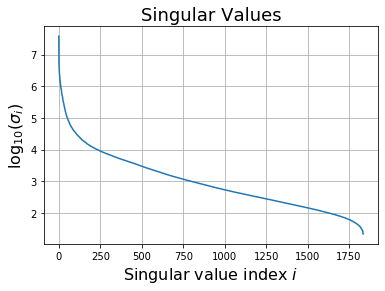

In [15]:
# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# Compute the SVD
U,s,VT = np.linalg.svd(Ar,full_matrices=False)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Singular Values', fontsize=18)
plt.grid()
plt.show()

In [22]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 10
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

TerrT = 0 # The total average error for a final number
TerrH = 0 # The total average error for a final number
for i in range(k):
    Ahold = Adata[:,:,i]
    yhold = ydata[:,:,i]
    
    # reloving all elements from the list
    AtrainList.clear()
    ytrainList.clear()
    for j in range(k):
        if i != j: # Assining training databut not the hold out data
            AtrainList.append(Adata[:,:,j])
            ytrainList.append(ydata[:,:,j])
    # converting lists 
    Atrain = np.vstack(AtrainList)
    ytrain = np.vstack(ytrainList)

    
    # Calculating the singular values of the training data
    U,s,VT = np.linalg.svd(Atrain,full_matrices=False)
    
    # Selecting data for feature reduction using a Truncated Singular Value approximation
    r = 1 # the number of singular values to retain

    Ur = U[:,0:r]
    Er = np.diag(s[0:r])
    Vr = np.transpose(VT[0:r,:])
    
    # SVD definition of the Psudo Inverse (Least Squares Training)
    w = Vr@np.linalg.inv(Er)@Ur.T@ytrain
    
    # Counting classification errors on the training set
    yOut = np.zeros((len(ytrain)) )
    eC = 0 # The Error Counter
    for ctr2 in range(len(yhold)):
        yOut[ctr2] = np.sign(Atrain[ctr2,:]@w)
    
        # Counting Classification Errors from the Calculated Weights
        if yOut[ctr2] != ytrain[ctr2]:
            eC = eC + 1
    print('Binary classification error rate on training data', (eC/len(ytrain))*100,'%')
    TerrT = TerrT + (eC/len(ytrain))
    
    
    # counting classification errors in the holdout set
    yOut = np.zeros((len(yhold)) )
    eC = 0 # The Error Counter
    for ctr2 in range(len(yhold)):
        yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    
        # Counting Classification Errors from the Calculated Weights
        if yOut[ctr2] != yhold[ctr2]:
            eC = eC + 1
    print('Binary classification error rate on holdout data', (eC/len(yhold))*100,'%\n')
    TerrH = TerrH + (eC/len(yhold))

print('\n')
# Total Average error
print('The Average Training Error is: ',(TerrT/k)*100,'%')
print('The Average Holdout Error is: ',(TerrH/k)*100,'%')

Binary classification error rate on training data 5.054945054945055 %
Binary classification error rate on holdout data 43.51648351648352 %

Binary classification error rate on training data 4.835164835164836 %
Binary classification error rate on holdout data 45.494505494505496 %

Binary classification error rate on training data 4.835164835164836 %
Binary classification error rate on holdout data 41.098901098901095 %

Binary classification error rate on training data 4.835164835164836 %
Binary classification error rate on holdout data 43.2967032967033 %

Binary classification error rate on training data 4.835164835164836 %
Binary classification error rate on holdout data 38.681318681318686 %

Binary classification error rate on training data 4.835164835164836 %
Binary classification error rate on holdout data 45.934065934065934 %

Binary classification error rate on training data 4.835164835164836 %
Binary classification error rate on holdout data 40.65934065934066 %

Binary classifica

### Systematically Trying Different Ammounts of Singular Values

In [30]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 10
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

r = np.linspace(1,1750,num=20)

for ctr1 in range(len(r)):
    TerrT = 0 # The total average error for a final number
    TerrH = 0 # The total average error for a final number
    for i in range(k):
        Ahold = Adata[:,:,i]
        yhold = ydata[:,:,i]
    
        # reloving all elements from the list
        AtrainList.clear()
        ytrainList.clear()
        for j in range(k):
            if i != j: # Assining training databut not the hold out data
                AtrainList.append(Adata[:,:,j])
                ytrainList.append(ydata[:,:,j])
        # converting lists 
        Atrain = np.vstack(AtrainList)
        ytrain = np.vstack(ytrainList)

    
        # Calculating the singular values of the training data
        U,s,VT = np.linalg.svd(Atrain,full_matrices=False)
    
        # Selecting data for feature reduction using a Truncated Singular Value approximation
        # r = 1 # the number of singular values to retain

        Ur = U[:,0:int(r[ctr1])]
        Er = np.diag(s[0:int(r[ctr1])])
        Vr = np.transpose(VT[0:int(r[ctr1]),:])
    
        # SVD definition of the Psudo Inverse (Least Squares Training)
        w = Vr@np.linalg.inv(Er)@Ur.T@ytrain
    
        # Counting classification errors on the training set
        yOut = np.zeros((len(ytrain)) )
        eC = 0 # The Error Counter
        for ctr2 in range(len(yhold)):
            yOut[ctr2] = np.sign(Atrain[ctr2,:]@w)
    
            # Counting Classification Errors from the Calculated Weights
            if yOut[ctr2] != ytrain[ctr2]:
                eC = eC + 1
        # print('Binary classification error rate on training data', (eC/len(ytrain))*100,'%')
        TerrT = TerrT + (eC/len(ytrain))
    
    
        # counting classification errors in the holdout set
        yOut = np.zeros((len(yhold)) )
        eC = 0 # The Error Counter
        for ctr2 in range(len(yhold)):
            yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    
            # Counting Classification Errors from the Calculated Weights
            if yOut[ctr2] != yhold[ctr2]:
                eC = eC + 1
        # print('Binary classification error rate on holdout data', (eC/len(yhold))*100,'%\n')
        TerrH = TerrH + (eC/len(yhold))

    print('\n')
    # Total Average error
    print('The Average Training Error is: ',(TerrT/k)*100,'%')
    print('The Average Holdout Error is: ',(TerrH/k)*100,'%')



The Average Training Error is:  5.208791208791208 %
The Average Holdout Error is:  42.79120879120879 %


The Average Training Error is:  3.189255189255189 %
The Average Holdout Error is:  28.57142857142857 %


The Average Training Error is:  3.003663003663003 %
The Average Holdout Error is:  28.329670329670325 %


The Average Training Error is:  2.910866910866911 %
The Average Holdout Error is:  29.076923076923077 %


The Average Training Error is:  2.905982905982906 %
The Average Holdout Error is:  29.494505494505496 %


The Average Training Error is:  2.7423687423687433 %
The Average Holdout Error is:  30.065934065934062 %


The Average Training Error is:  2.652014652014652 %
The Average Holdout Error is:  30.10989010989011 %


The Average Training Error is:  2.5347985347985347 %
The Average Holdout Error is:  30.945054945054938 %


The Average Training Error is:  2.4371184371184373 %
The Average Holdout Error is:  31.18681318681319 %


The Average Training Error is:  2.27106227106

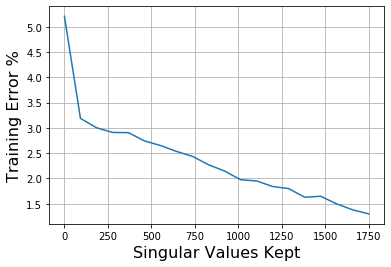

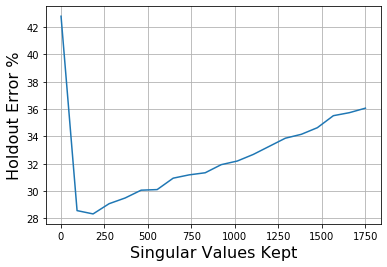

In [39]:
# Compiling vectors of the average training and holdout error for a range of singular values
r = np.linspace(1,1750,num=20)

aTerr = [5.208791208791208,3.189255189255189,3.003663003663003,2.910866910866911,2.905982905982906,2.7423687423687433,2.652014652014652,
        2.5347985347985347,2.4371184371184373,2.2710622710622714,2.146520146520147,1.9755799755799757,1.9511599511599513,1.8412698412698412,
         1.7997557997557998,1.6288156288156288,1.648351648351648,1.496947496947497,1.37973137973138,1.2991452991452994]

aHerr = [42.79120879120879,28.57142857142857,28.329670329670325,29.076923076923077,29.494505494505496,30.065934065934062,30.10989010989011,
        30.945054945054938,31.18681318681319,31.34065934065934,31.934065934065934,32.1978021978022,32.681318681318686,33.274725274725284,
        33.868131868131876,34.15384615384616,34.63736263736264,35.51648351648352,35.73626373626374,36.065934065934066]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r,aTerr)
ax.set_xlabel('Singular Values Kept', fontsize=16)
ax.set_ylabel('Training Error %', fontsize=16)
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r,aHerr)
ax.set_xlabel('Singular Values Kept', fontsize=16)
ax.set_ylabel('Holdout Error %', fontsize=16)
plt.grid()
plt.show()


## Exploring Bias vs Varriance Tradeoff using Ridge Regression

Our model has as many as 30000 features or pixles. As a result there is a strong posibility of overfitting the weights to the training data. Some evidence of this is shown in the fact that the least squares classifier always performs better on the training data and worse on the holdout data. This could mean that our model might not be generalizing as well as it could. Ridge regression is one way to explore the tradeoff between bias and variance in the model. 

To do so we again use crossvalidation to test different lambda values. However we use one holdout set to test regularization paramaters on and another holdout set to crossvalidate the model on.

In [46]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 10
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

TerrT = 0 # The total average error for a final number
TerrH = 0 # The total average error for a final number



lam = 10000000000000000
for i in range(k):
    Ahold = Adata[:,:,i]
    yhold = ydata[:,:,i]
    
    # reloving all elements from the list
    AtrainList.clear()
    ytrainList.clear()
    for j in range(k):
        if i != j: # Assining training databut not the hold out data
            AtrainList.append(Adata[:,:,j])
            ytrainList.append(ydata[:,:,j])
    # converting lists 
    Atrain = np.vstack(AtrainList)
    ytrain = np.vstack(ytrainList)

    
    # Ridge Regression
    w = np.linalg.inv(Atrain.T@Atrain + lam*np.identity(len(Atrain.T@Atrain)) )@Atrain.T@ytrain
    
    # Counting classification errors on the training set
    yOut = np.zeros((len(ytrain)) )
    eC = 0 # The Error Counter
    for ctr2 in range(len(yhold)):
        yOut[ctr2] = np.sign(Atrain[ctr2,:]@w)
    
        # Counting Classification Errors from the Calculated Weights
        if yOut[ctr2] != ytrain[ctr2]:
            eC = eC + 1
    print('Binary classification error rate on training data', (eC/len(ytrain))*100,'%')
    TerrT = TerrT + (eC/len(ytrain))
    
    
    # counting classification errors in the holdout set
    yOut = np.zeros((len(yhold)) )
    eC = 0 # The Error Counter
    for ctr2 in range(len(yhold)):
        yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    
        # Counting Classification Errors from the Calculated Weights
        if yOut[ctr2] != yhold[ctr2]:
            eC = eC + 1
    print('Binary classification error rate on holdout data', (eC/len(yhold))*100,'%\n')
    TerrH = TerrH + (eC/len(yhold))

print('\n')
# Total Average error
print('The Average Training Error is: ',(TerrT/k)*100,'%')
print('The Average Holdout Error is: ',(TerrH/k)*100,'%')


Binary classification error rate on training data 4.908424908424909 %
Binary classification error rate on holdout data 43.956043956043956 %

Binary classification error rate on training data 4.884004884004884 %
Binary classification error rate on holdout data 44.175824175824175 %

Binary classification error rate on training data 4.884004884004884 %
Binary classification error rate on holdout data 40.879120879120876 %

Binary classification error rate on training data 4.884004884004884 %
Binary classification error rate on holdout data 43.956043956043956 %

Binary classification error rate on training data 4.884004884004884 %
Binary classification error rate on holdout data 43.73626373626374 %

Binary classification error rate on training data 4.884004884004884 %
Binary classification error rate on holdout data 39.120879120879124 %

Binary classification error rate on training data 4.884004884004884 %
Binary classification error rate on holdout data 42.1978021978022 %

Binary classific

### Systematically Testing Regularization Paramaters

In [80]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 10
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

N = 40
lam = np.reshape(np.logspace(0,15,num=N),(N,1))

TerrTp = np.zeros((1,len(lam))) # The total average error for each regularization paramater
TerrHp = np.zeros((1,len(lam))) # The total average error for each lambda

for ctr1 in range(len(lam)):
    TerrT = 0 # The total average error for a final number
    TerrH = 0 # The total average error for a final number
    for i in range(k):
        Ahold = Adata[:,:,i]
        yhold = ydata[:,:,i]
    
        # reloving all elements from the list
        AtrainList.clear()
        ytrainList.clear()
        for j in range(k):
            if i != j: # Assining training databut not the hold out data
                AtrainList.append(Adata[:,:,j])
                ytrainList.append(ydata[:,:,j])
        # converting lists 
        Atrain = np.vstack(AtrainList)
        ytrain = np.vstack(ytrainList)

        # Ridge Regression
        w = np.linalg.inv(Atrain.T@Atrain + lam[ctr1]*np.identity(len(Atrain.T@Atrain)) )@Atrain.T@ytrain
    
        # Counting classification errors on the training set
        yOut = np.zeros((len(ytrain)) )
        eC = 0 # The Error Counter
        for ctr2 in range(len(yhold)):
            yOut[ctr2] = np.sign(Atrain[ctr2,:]@w)
    
            # Counting Classification Errors from the Calculated Weights
            if yOut[ctr2] != ytrain[ctr2]:
                eC = eC + 1
        # print('Binary classification error rate on training data', (eC/len(ytrain))*100,'%')
        TerrT = TerrT + (eC/len(ytrain))
    
    
        # counting classification errors in the holdout set
        yOut = np.zeros((len(yhold)) )
        eC = 0 # The Error Counter
        for ctr2 in range(len(yhold)):
            yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    
            # Counting Classification Errors from the Calculated Weights
            if yOut[ctr2] != yhold[ctr2]:
                eC = eC + 1
        # print('Binary classification error rate on holdout data', (eC/len(yhold))*100,'%\n')
        TerrH = TerrH + (eC/len(yhold))

    TerrTp[0,ctr1] = (TerrT/k)*100
    TerrHp[0,ctr1] = (TerrH/k)*100
    print('\n')
    # Total Average error
    print('The Average Training Error is: ',(TerrT/k)*100,'%')
    print('The Average Holdout Error is: ',(TerrH/k)*100,'%')



The Average Training Error is:  1.3211233211233213 %
The Average Holdout Error is:  35.89010989010989 %


The Average Training Error is:  1.3211233211233213 %
The Average Holdout Error is:  35.89010989010989 %


The Average Training Error is:  1.3211233211233213 %
The Average Holdout Error is:  35.89010989010989 %


The Average Training Error is:  1.3211233211233213 %
The Average Holdout Error is:  35.86813186813187 %


The Average Training Error is:  1.3235653235653237 %
The Average Holdout Error is:  35.8021978021978 %


The Average Training Error is:  1.3211233211233213 %
The Average Holdout Error is:  35.86813186813187 %


The Average Training Error is:  1.3040293040293045 %
The Average Holdout Error is:  35.86813186813187 %


The Average Training Error is:  1.3040293040293045 %
The Average Holdout Error is:  35.824175824175825 %


The Average Training Error is:  1.308913308913309 %
The Average Holdout Error is:  35.64835164835165 %


The Average Training Error is:  1.34065934065

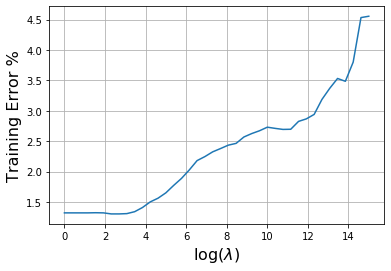

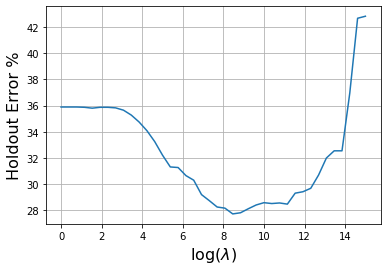

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(lam),TerrTp.T)
ax.set_xlabel('log($\lambda$)', fontsize=16)
ax.set_ylabel('Training Error %', fontsize=16)
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(lam),TerrHp.T)
ax.set_xlabel('log($\lambda$)', fontsize=16)
ax.set_ylabel('Holdout Error %', fontsize=16)
plt.grid()
plt.show()

## Repeating Binary Classifier Training with SVM Cost Function for Comparison

The SVM classifier had trouble handling the entire dataset and generally returned a classification error of about 50%. to try to reduce the size of the dataset a select number of images were used to train the classifier to reduce the computational load used to train the SVM binary classifier.

In [3]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Video\\img\\*.png")]

A1 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Video\\ann\\*.json")]

y1 = np.array(extractLabels(labels)) # calling the function to form binary labels
y1 = np.reshape(y1,(len(y1[0]),1))
# print(y2)

In [4]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Images Tagged as Valid\\Filming Day 2 Video\\img\\*.png")]

A2 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Images Tagged as Valid\\Filming Day 2 Video\\ann\\*.json")]

y2 = np.array(extractLabels(labels)) # calling the function to form binary labels
y2 = np.reshape(y2,(len(y2[0]),1))
# print(y2)

In [5]:
# Creating a larger array from the two data files read in
A = np.vstack((A1,A2))
y = np.vstack((y1,y2))

In [19]:
# selecting a random reduced dataset to train on 
# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

# images or rows to use for training
keep = 2800

Ar = rdata[0:keep,0:len(A[0])]
yr = rdata[0:keep,len(A[0]):len(rdata[0])]

# Holdout Images
Ah = rdata[keep:len(A),0:len(A[0])]
yh = rdata[keep:len(A),len(A[0]):len(rdata[0])]
print(len(yh))

278


In [ ]:
# Training The SVM classifier     
clf = LinearSVC(random_state=0, tol=5, max_iter=1000000,C=1) # C is the regularization paramater
clf.fit(Ar, np.squeeze(yr))
w = clf.coef_.transpose()

yOut = np.zeros((len(y)) )
eC = 0 # The Error Counter
for i in range(len(Ar)):
    yOut[i] = np.sign(Ar[i,:]@w)

    # Counting Classification Errors from the Calculated Weights
    if yOut[i] != yr[i]:
        eC = eC + 1
print('Binary classification error rate on training data', (eC/len(y))*100,'%')

yhOut = np.zeros((len(yh)) )
eC = 0 # The Error Counter
for i in range(len(Ah)):
    yhOut[i] = np.sign(Ah[i,:]@w)

    # Counting Classification Errors from the Calculated Weights
    if yhOut[i] != yh[i]:
        eC = eC + 1
print('Binary classification error rate on holdout data', (eC/len(yh))*100,'%')

### looping through regularization pramaters

In [16]:
lam = np.logspace(0,15,num=10)
for ctr in range(len(lam)):
    # Training The SVM classifier     
    clf = LinearSVC(random_state=0, tol=10, max_iter=1000000,C=lam[ctr]) # C is the regularization paramater
    clf.fit(Ar, np.squeeze(yr))
    w = clf.coef_.transpose()

    yOut = np.zeros((len(y)) )
    eC = 0 # The Error Counter
    for i in range(len(Ar)):
        yOut[i] = np.sign(Ar[i,:]@w)

        # Counting Classification Errors from the Calculated Weights
        if yOut[i] != yr[i]:
            eC = eC + 1
    print('Binary classification error rate on training data', (eC/len(y))*100,'%')

    yhOut = np.zeros((len(yh)) )
    eC = 0 # The Error Counter
    for i in range(len(Ah)):
        yhOut[i] = np.sign(Ah[i,:]@w)

        # Counting Classification Errors from the Calculated Weights
        if yhOut[i] != yh[i]:
            eC = eC + 1
    print('Binary classification error rate on holdout data', (eC/len(yh))*100,'%')

Binary classification error rate on training data 29.66211825860949 %
Binary classification error rate on holdout data 32.37410071942446 %
Binary classification error rate on training data 29.66211825860949 %
Binary classification error rate on holdout data 32.37410071942446 %
Binary classification error rate on training data 29.66211825860949 %
Binary classification error rate on holdout data 32.37410071942446 %
Binary classification error rate on training data 29.66211825860949 %
Binary classification error rate on holdout data 32.37410071942446 %
Binary classification error rate on training data 29.66211825860949 %
Binary classification error rate on holdout data 32.37410071942446 %
Binary classification error rate on training data 29.66211825860949 %
Binary classification error rate on holdout data 32.37410071942446 %
Binary classification error rate on training data 29.66211825860949 %
Binary classification error rate on holdout data 32.37410071942446 %
Binary classification error

In [17]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 10
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4) re arranging into the "k-1" dataset and holdout data and calculating average classification error
AtrainList = []
ytrainList = []

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

N = 40
lam = np.reshape(np.logspace(0,15,num=N),(N,1))

TerrTp = np.zeros((1,len(lam))) # The total average error for each regularization paramater
TerrHp = np.zeros((1,len(lam))) # The total average error for each lambda

for ctr1 in range(len(lam)):
    TerrT = 0 # The total average error for a final number
    TerrH = 0 # The total average error for a final number
    for i in range(k):
        Ahold = Adata[:,:,i]
        yhold = ydata[:,:,i]
    
        # reloving all elements from the list
        AtrainList.clear()
        ytrainList.clear()
        for j in range(k):
            if i != j: # Assining training databut not the hold out data
                AtrainList.append(Adata[:,:,j])
                ytrainList.append(ydata[:,:,j])
        # converting lists 
        Atrain = np.vstack(AtrainList)
        ytrain = np.vstack(ytrainList)

        # Training The SVM classifier     
        clf = LinearSVC(random_state=0, tol=10, max_iter=1000000,C=lam[ctr]) # C is the regularization paramater
        clf.fit(Ar, np.squeeze(yr))
        w = clf.coef_.transpose()
    
        # Counting classification errors on the training set
        yOut = np.zeros((len(ytrain)) )
        eC = 0 # The Error Counter
        for ctr2 in range(len(yhold)):
            yOut[ctr2] = np.sign(Atrain[ctr2,:]@w)
    
            # Counting Classification Errors from the Calculated Weights
            if yOut[ctr2] != ytrain[ctr2]:
                eC = eC + 1
        # print('Binary classification error rate on training data', (eC/len(ytrain))*100,'%')
        TerrT = TerrT + (eC/len(ytrain))
    
    
        # counting classification errors in the holdout set
        yOut = np.zeros((len(yhold)) )
        eC = 0 # The Error Counter
        for ctr2 in range(len(yhold)):
            yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    
            # Counting Classification Errors from the Calculated Weights
            if yOut[ctr2] != yhold[ctr2]:
                eC = eC + 1
        # print('Binary classification error rate on holdout data', (eC/len(yhold))*100,'%\n')
        TerrH = TerrH + (eC/len(yhold))

    TerrTp[0,ctr1] = (TerrT/k)*100
    TerrHp[0,ctr1] = (TerrH/k)*100
    print('\n')
    # Total Average error
    print('The Average Training Error is: ',(TerrT/k)*100,'%')
    print('The Average Holdout Error is: ',(TerrH/k)*100,'%')



The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
The Average Holdout Error is:  36.41693811074919 %


The Average Training Error is:  4.136807817589577 %
T

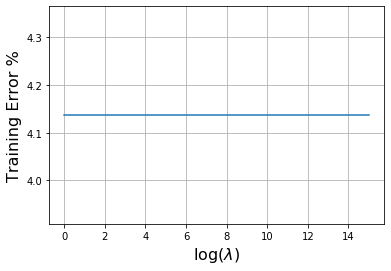

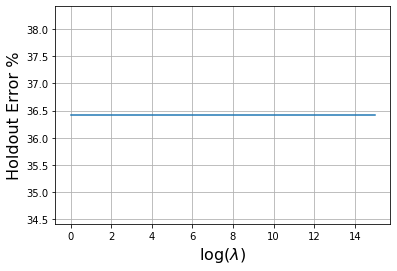

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(lam),TerrTp.T)
ax.set_xlabel('log($\lambda$)', fontsize=16)
ax.set_ylabel('Training Error %', fontsize=16)
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(lam),TerrHp.T)
ax.set_xlabel('log($\lambda$)', fontsize=16)
ax.set_ylabel('Holdout Error %', fontsize=16)
plt.grid()
plt.show()

### Testing image resizing code to decrease the number of features (Image preprocessing pipeline)

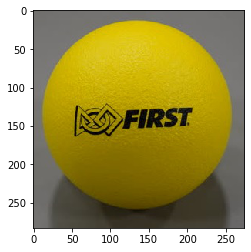

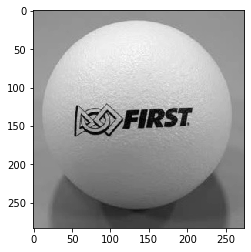

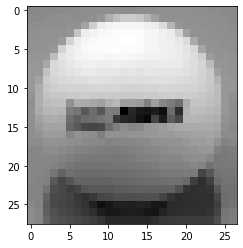

In [86]:
# loading a ball template for template matching of balls
temp = plt.imread("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\BallTemplate3.jpg")
plt.imshow(temp)
plt.show()

# Converting to Grayscale
grayTemp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)
plt.imshow(grayTemp,cmap='gray')
plt.show()

# resizing the image to reduce the number of features and the 
scale_percent = 10 # percent of original size
width = int(grayTemp.shape[1] * scale_percent / 100)
height = int(grayTemp.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
grayResizedTemp = cv2.resize(grayTemp, dim, interpolation = cv2.INTER_AREA)
plt.imshow(grayResizedTemp, cmap='gray')
plt.show()

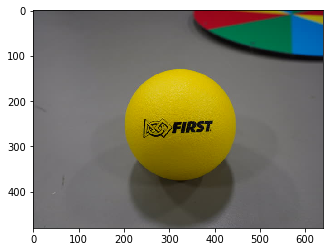

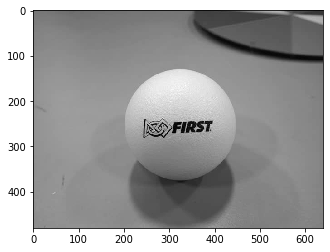

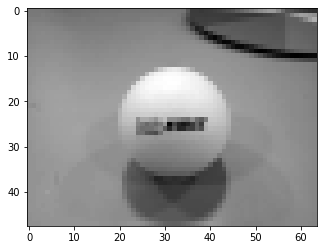

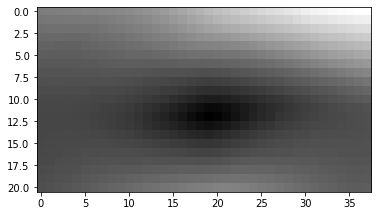

In [87]:
# "pops" the image from the list 
# A = images.pop(100)
A = plt.imread("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\DSC02174.jpg")
plt.imshow(A)
plt.show()

# Blurring the Image
# A = cv2.medianBlur(A,15)
#plt.imshow(A)
#plt.show()

# Converting to Grayscale
gray = cv2.cvtColor(A, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

# resizing the image to reduce the number of features
# scale_percent = 25 # percent of original size
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
grayResized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
plt.imshow(grayResized.astype(np.float32), cmap='gray')
plt.show()

# template matching with the ball image
#   cv::TM_SQDIFF = 0,
#   cv::TM_SQDIFF_NORMED = 1,
#   cv::TM_CCORR = 2,
#   cv::TM_CCORR_NORMED = 3,
#   cv::TM_CCOEFF = 4,
#   cv::TM_CCOEFF_NORMED = 5
res = cv2.matchTemplate(grayResized.astype(np.float32),grayResizedTemp.astype(np.float32),1) # expects a 
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
plt.imshow(res.astype(np.float32), cmap='gray')
plt.show()